<a href="https://colab.research.google.com/github/RohanMathur17/Deep-Learning-With-Python-By-Francois-Chollet/blob/master/Chapter%203/Ch3_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Boston House Prediction - Regression Example

In [1]:
from keras.datasets import boston_housing

(train_data , train_targets) ,(test_data , test_targets) = boston_housing.load_data()

In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [5]:
print(max(train_targets))
print(min(train_targets))

50.0
5.0


In [6]:
# Normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)

train_data /= std
test_data -= mean
test_data /= std

In [7]:
from keras import layers
from keras import models

def build_model():

    model = models.Sequential()
    model.add(layers.Dense(64 , activation = 'relu' , input_shape = (train_data.shape[1] ,)))
    model.add(layers.Dense(64 , activation = 'relu'))

    model.add(layers.Dense(1))  #Ending model (linear layer)

    model.compile(optimizer = 'rmsprop' , loss = 'mse', metrics = ['mae'])    # MSE - square of the difference between the predictions and the targets

    return model

In [8]:
# K Fold Validation
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [9]:
for i in range(k):

    print('processing fold #', i)

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    
    model = build_model()

    model.fit(partial_train_data, partial_train_targets,
          epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [10]:
all_scores #Mean Absoulute errors

[2.240622043609619, 2.2834534645080566, 2.391756296157837, 2.3748393058776855]

In [12]:
np.mean(all_scores)  # In this case, you’re off by $2,300 on average, which is significant considering that the prices range from $10,000 to $50,000.

2.3226677775382996

In [17]:
#Performing validation log for each fold for 500 epochs per K

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                             axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1)
    
    mae_history = history.history['val_mae']
    
    all_mae_histories.append(mae_history)
    


processing fold # 0
Epoch 1/500
303/303 [==============================] - 0s 1ms/step - loss: 221.1133 - mae: 11.1717 - val_loss: 36.6732 - val_mae: 3.8110
Epoch 2/500
303/303 [==============================] - 0s 1ms/step - loss: 30.3078 - mae: 3.6099 - val_loss: 23.5528 - val_mae: 3.0518
Epoch 3/500
303/303 [==============================] - 0s 1ms/step - loss: 22.5457 - mae: 3.1094 - val_loss: 19.8720 - val_mae: 2.6391
Epoch 4/500
303/303 [==============================] - 0s 1ms/step - loss: 19.4617 - mae: 2.8669 - val_loss: 16.3457 - val_mae: 2.6459
Epoch 5/500
303/303 [==============================] - 0s 1ms/step - loss: 16.8964 - mae: 2.7103 - val_loss: 19.3939 - val_mae: 2.7539
Epoch 6/500
303/303 [==============================] - 0s 1ms/step - loss: 17.0528 - mae: 2.6949 - val_loss: 14.2445 - val_mae: 2.3295
Epoch 7/500
303/303 [==============================] - 0s 1ms/step - loss: 15.2454 - mae: 2.4184 - val_loss: 15.0721 - val_mae: 2.5321
Epoch 8/500
303/303 [============

In [16]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [19]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

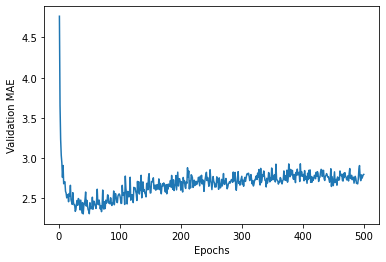

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

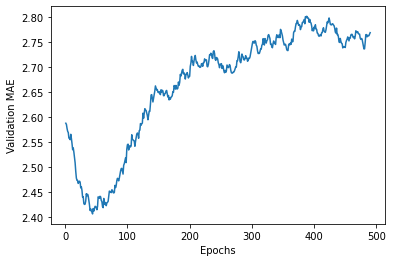

In [25]:
# Scaling the plot by removing first 10 epochs

def smooth_curve(points, factor=0.9):

    smoothed_points = []

    for point in points:

        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        
        else:
            smoothed_points.append(point)
    
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [26]:
#As visible , validation MAE Starts increasing after approx 80 epochs

model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 17.2930 - mae: 2.6183


In [27]:
test_mae_score

2.6182544231414795